In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [35]:
data = pd.read_csv('BNB2019-2024.csv')
close_prices = data['Close']

In [36]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 6:4
train_size = int(len(close_prices) * 0.6)
train, test = close_prices[:train_size], close_prices[train_size:]

In [37]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [39]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [40]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 80.5980603924192
MAPE: 26.58705860442785
MSE: 6496.047339020053


### Dự báo

#### Dự báo 30 ngày

In [41]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    342.424022
1816    387.662257
1817    355.311703
1818    359.432489
1819    347.496034
1820    328.303995
1821    338.425474
1822    326.780887
1823    320.291977
1824    321.360334
1825    313.935986
1826    328.421190
1827    323.126961
1828    323.124257
1829    319.902064
1830    318.809329
1831    318.800754
1832    322.201756
1833    320.747919
1834    337.963951
1835    332.912684
1836    336.169742
1837    324.637779
1838    328.682340
1839    324.222827
1840    320.914483
1841    321.139451
1842    324.790068
1843    321.700882
1844    322.546366
1845    321.968378
dtype: float64


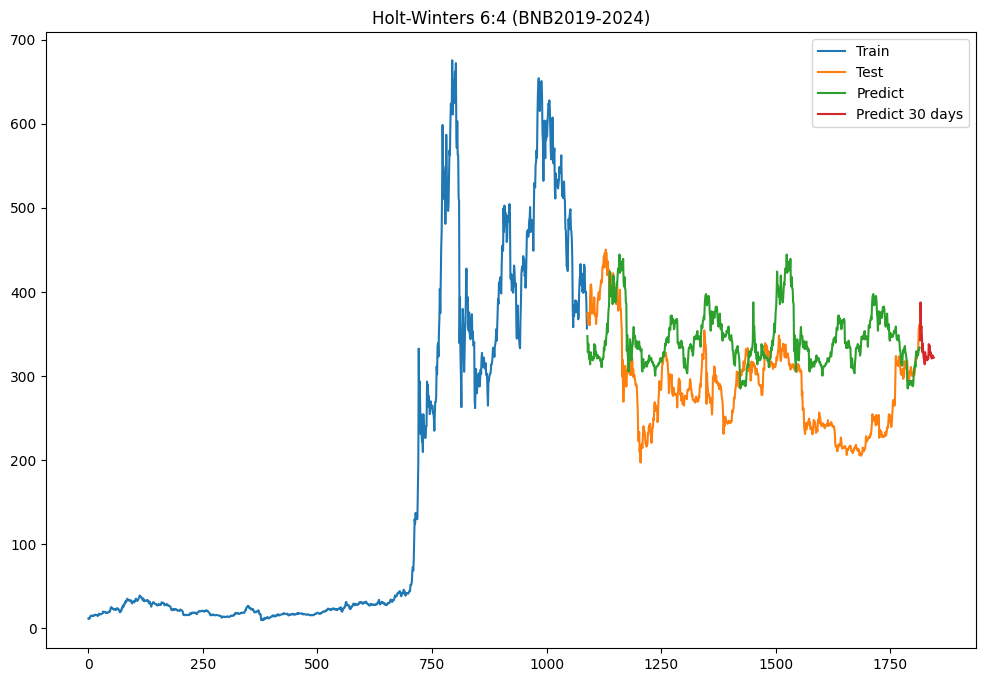

In [42]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [43]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    342.424022
1816    387.662257
1817    355.311703
1818    359.432489
1819    347.496034
           ...    
1871    404.930996
1872    394.048838
1873    397.892751
1874    385.521941
1875    393.150848
Length: 61, dtype: float64


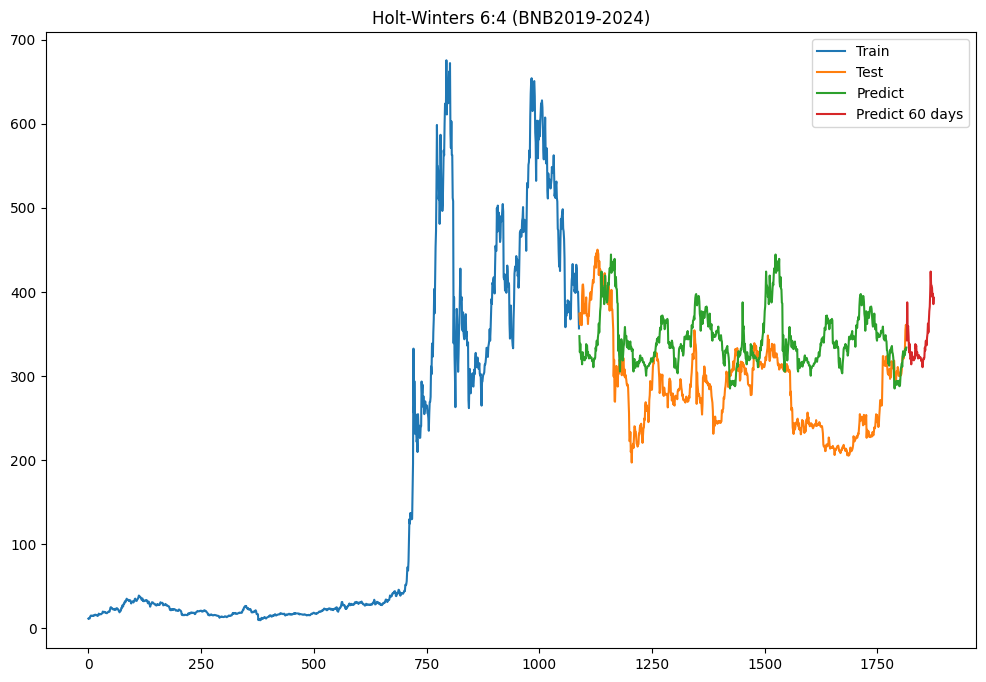

In [44]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [45]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    342.424022
1816    387.662257
1817    355.311703
1818    359.432489
1819    347.496034
           ...    
1901    403.972888
1902    403.481343
1903    387.406317
1904    386.272862
1905    329.928734
Length: 91, dtype: float64


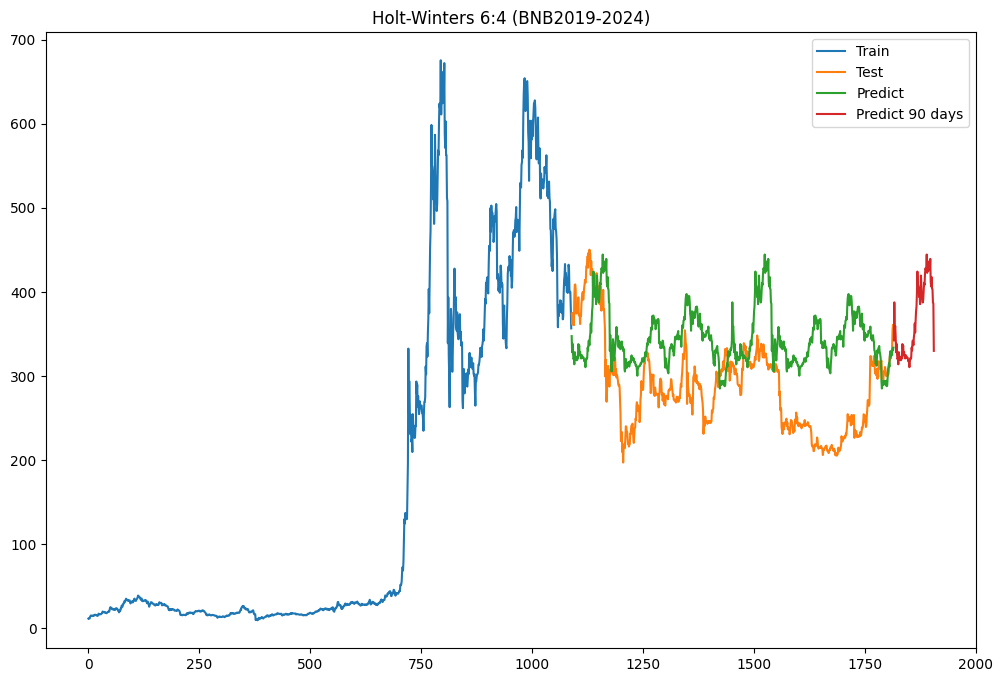

In [46]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict90_days.index, predict90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

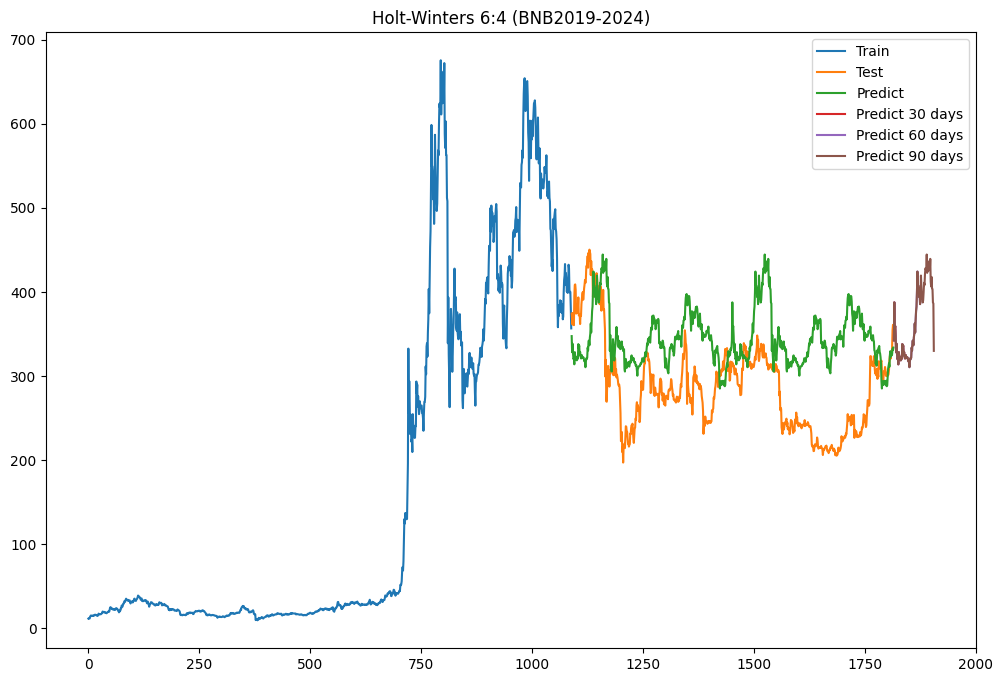

In [47]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()